In [1]:
import os
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.utils_data import create_distortions_batch, distort_images

In [2]:
folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

with tqdm(total=len(files), desc="Images to Distort") as pbar:
    for i, f in enumerate(files):
        img_path = os.path.join(folder_path, f)
        create_distortions_batch(img_path, folder_path, batch_size=32, counter=i)
        pbar.update(1)
        if i == 0:
            break

Images to Distort:   0%|          | 0/410 [00:00<?, ?it/s]

/Users/choekyelnyungmartsang/opt/anaconda3/envs/ARNIQA/lib/python3.10/site-packages/torchvision/transforms/functional.py:685: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_matrix = torch.tensor(startpoints, dtype=torch.float).view(8)
Images to Distort:   0%|          | 1/410 [00:08<1:01:08,  8.97s/it]


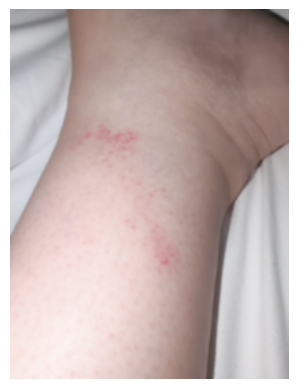

Distortions: ['perspective_bottom', 'gaussian_blur', 'brighten', 'color_saturation1']
Values: [0.0, 3, 0.4, 0.2]


In [22]:
folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

#with tqdm(total=len(files), desc="Images to Distort") as pbar:
for i, f in enumerate(files):
    img_path = os.path.join(folder_path, f)
    orig_image = Image.open(img_path).convert('RGB')
    orig_image = transforms.ToTensor()(orig_image)
    img_A_orig, distort_functions, distort_values = distort_images(orig_image)
    plt.imshow(img_A_orig.permute(1, 2, 0)), plt.axis('off'), plt.show()
    distort_functions = [f.__name__ for f in distort_functions]
    print(f"Distortions: {distort_functions}")
    print(f"Values: {distort_values}")
    #pbar.update(1)
    if i == 0:
        break

In [3]:
from utils.utils_data import resize_crop, center_corners_crop

folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

# normal crop
test_path = os.path.join(folder_path, files[1])
transform = transforms.Compose([
    #transforms.Resize(256),                      # Resize the image to 256x256
    #transforms.CenterCrop(224),                  # Center crop the image to 224x224
    transforms.ToTensor(),                       # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])
orig_image = Image.open(test_path).convert('RGB')
image = transform(orig_image)
#image = transform(image).unsqueeze(0)

# center_corners_crop
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img1 = Image.open(test_path).convert('RGB')
img1 = center_corners_crop(img1, crop_size=224)
img1 = [transforms.ToTensor()(crop) for crop in img1]
img1 = torch.stack(img1, dim=0)
im1g = normalize(img1)

# resize_crop
img2 = Image.open(test_path).convert('RGB')
img2 = resize_crop(img2, crop_size=224)
img2 = transforms.ToTensor()(img2)

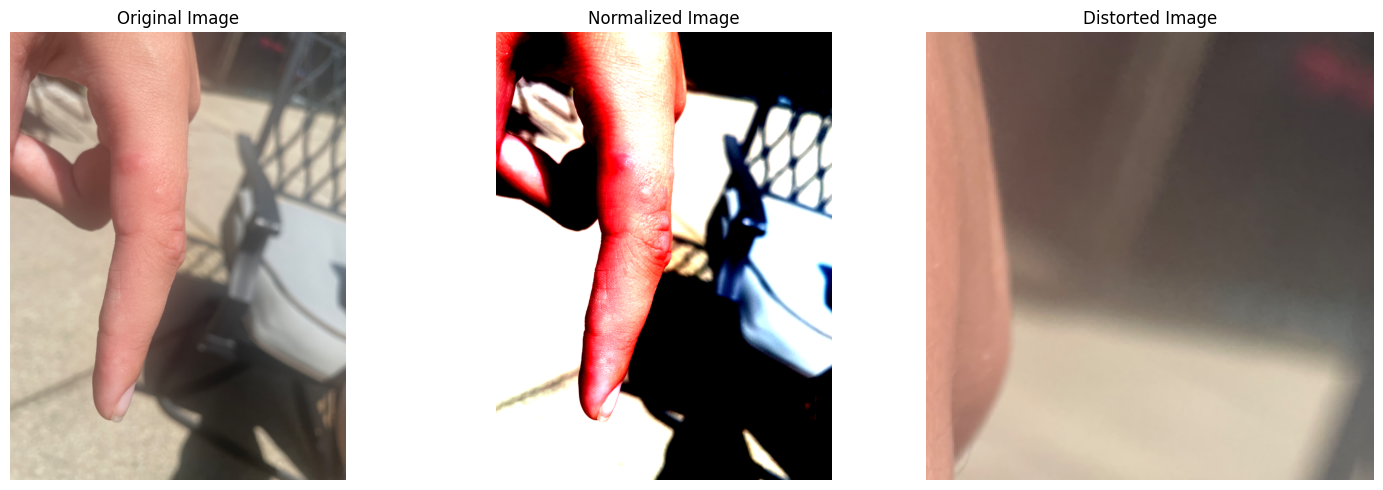

In [10]:
def display(orig_img, crop_img, distort_img):
    _, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with three subplots
    axes[0].imshow(orig_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(crop_img.permute(1, 2, 0).cpu().numpy().clip(0, 1))
    axes[1].set_title('Normalized Image')
    axes[1].axis('off')
    axes[2].imshow(distort_img.permute(1, 2, 0).cpu().numpy())
    axes[2].set_title('Distorted Image')
    axes[2].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap of subplots
    plt.show()
display(orig_image, image, img2)

In [7]:
img2.shape

torch.Size([3, 224, 224])